# Unsupervised Learning project: Mixture of balls with different volumes 
<hr style="border-width:2px;border-color:#A93226">


## Thomas Marcoux Pépin et Odélia Guedj
#### M2 Data Science
<hr style="border-width:2px;border-color:blue">

In [1]:
import numpy as np
from random import gauss
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from random import seed
from random import sample
from random import uniform
from scipy.stats import multivariate_normal

## Exercice 1: Simulation
<hr style="border-width:2px;border-color:blue">

### Question 1 


On simule un échantilloon de 1000 vectuers isuus mélange gaussien bidimentionnel dont les paramètres sont:
* Proportion: $\pi_1 = \pi_2 = {1\over2}$
* Vecteurs moyenne: $\mu_1 = \mu_2 = (1,2)^T$
* Matrices de variance-covariance: $\Sigma_1 = I$ et $\Sigma_2 = 4I$

In [2]:
pi_1 = 0.5
pi_2 = pi_1
mu_1 = np.array([1,2])
mu_2 = mu_1
sigma_1 = np.eye(2,2)
sigma_2 = 4*np.eye(2,2)
n_samples = 1000

In [3]:
simu = pi_1*np.random.multivariate_normal(mu_1, sigma_1, n_samples)+pi_2*np.random.multivariate_normal(mu_2, sigma_2, n_samples)

In [4]:
simu_df = pd.DataFrame(simu)

### Question 2: Affichage de l'échantillon

Affichage de l'échantillon

In [5]:
print("Dataset shape:", simu_df.shape)

Dataset shape: (1000, 2)


In [6]:
simu_df.head(5)

,0,1
0,0.195307,3.256562
1,2.506041,0.912600
2,1.323733,0.464072
3,1.812236,4.623816
4,-0.138375,0.612515


Text(0.5, 1.0, 'Simulation of a Gaussian Mixture')

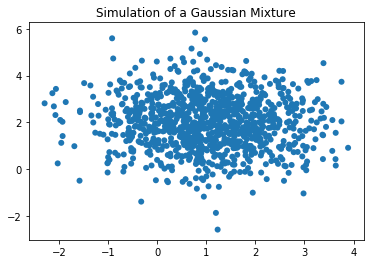

In [7]:
plt.scatter(simu_df.iloc[:,0], simu_df.iloc[:,1], marker = 'o', edgecolors = 'none')
plt.title('Simulation of a Gaussian Mixture')

### Question 3: Contour plot

Text(0.5, 1.0, 'Coutour plot of the Gaussian Mixture')

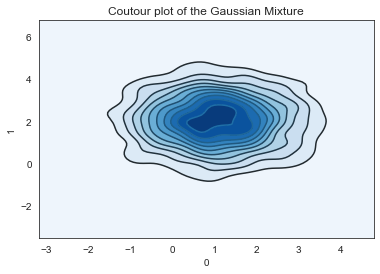

In [8]:
sns.set_style("white")
sns.kdeplot(simu_df.iloc[:,0], simu_df.iloc[:,1])
sns.kdeplot(simu_df.iloc[:,0], simu_df.iloc[:,1],cmap = "Reds" ,shade=True, bw=.15)
sns.kdeplot(simu_df.iloc[:,0], simu_df.iloc[:,1], cmap="Blues", shade=True, shade_lowest=True, )
plt.title('Coutour plot of the Gaussian Mixture')

## Exercice 2: GaussianMixture (equivalent de Mclust) versus kmeans
<hr style="border-width:2px;border-color:blue">

### Question 1: GaussianMixture

On utilise la fonction GaussianMixture de sk-learn qui fonctionne de la même manière que Mclust de la library mclust de R.
On peut préciser le nombre de clusters, la méthode d'initialisation (à choisir entre random et k-means) et le type de matrice de variance-covariance. Cette dernière fonctionnalité correspond à l'argument modelname de Mclust. Il y a quatre choix possibles:
* *diag* : Tous les clustsers ont une matrice de variance covariance diagonale distincte,
* *full* : Tous les clusters ont une matrice de variance covariance pleine distincte,
* *tied* : Tous les clusters ont la même matrice de variance covariance pleine,
* *spherical* : Tous les clusters ont leur propre variance



Nombre de lignes dans la classe 0: 1000
Nombre de lignes dans la classe 1: 0


In [27]:
GM_diag = GaussianMixture(covariance_type = 'diag', init_params = 'random')
GM_diag.fit(simu_df)
labels_GM_diag = GM_diag.predict(simu_df)
print('diag')
print("Nombre de lignes dans la classe 0:", np.shape(simu_df[labels_GM_diag == 0])[0])
print("Nombre de lignes dans la classe 1:", np.shape(simu_df[labels_GM_diag == 1])[0])

GM_full = GaussianMixture(covariance_type = 'full', init_params = 'random')
GM_full.fit(simu_df)
labels_GM_full = GM_full.predict(simu_df) 
print('full')
print("Nombre de lignes dans la classe 0:", np.shape(simu_df[labels_GM_full == 0])[0])
print("Nombre de lignes dans la classe 1:", np.shape(simu_df[labels_GM_full == 1])[0])

GM_tied = GaussianMixture(covariance_type = 'tied', init_params = 'random')
GM_tied.fit(simu_df)
labels_GM_tied = GM_tied.predict(simu_df)
print('tied')
print("Nombre de lignes dans la classe 0:", np.shape(simu_df[labels_GM_tied == 0])[0])
print("Nombre de lignes dans la classe 1:", np.shape(simu_df[labels_GM_tied == 1])[0])

GM_spherical = GaussianMixture(covariance_type = 'spherical', init_params = 'random')
GM_spherical.fit(simu_df)
labels_GM_spherical = GM_spherical.predict(simu_df)
print('spherical')
print("Nombre de lignes dans la classe 0:", np.shape(simu_df[labels_GM_spherical == 0])[0])
print("Nombre de lignes dans la classe 1:", np.shape(simu_df[labels_GM_spherical == 1])[0])

diag
Nombre de lignes dans la classe 0: 1000
Nombre de lignes dans la classe 1: 0
full
Nombre de lignes dans la classe 0: 1000
Nombre de lignes dans la classe 1: 0
tied
Nombre de lignes dans la classe 0: 1000
Nombre de lignes dans la classe 1: 0
spherical
Nombre de lignes dans la classe 0: 1000
Nombre de lignes dans la classe 1: 0


On remarque que peut importe la forme de la matrice de variance covariance choisie, lorsque l'on ne précise par le nombre de clusters l'algorithme ne parvient pas à distinguer les 2 gaussiennes de la loi mélange simulée.
Cela vient en partie du fait que les deux lois simulées ont la même espérance et se confondent.

### Question 2: Estimation des paramètres

Que valent les paramètres éstimés lorsque l'on force à 2 le nombre de clusters et que l'on précise que les matrices de varaiance-covariance sont diagonales et spécifiques à chaque cluster ?

In [29]:
GM_diag = GaussianMixture(covariance_type = 'spherical', n_components=2, init_params = 'random')
print("Les proportions des deux Gausiennes sont:" ,GM_diag.fit(simu).weights_)
print("Les vecteurs moyennes des deux Gausiennes sont:" ,GM_diag.fit(simu).means_)
print("Les matrices de variance-covariance des deux Gausiennes sont:\n" ,GM_diag.fit(simu).covariances_)


Les proportions des deux Gausiennes sont: [0.50387395 0.49612605]
Les vecteurs moyennes des deux Gausiennes sont: [[1.02690711 1.99489683]
 [1.01634235 2.0359041 ]]
Les matrices de variance-covariance des deux Gausiennes sont:
 [1.27401071 1.28719303]


In [30]:
labels = GM_diag.fit_predict(simu)

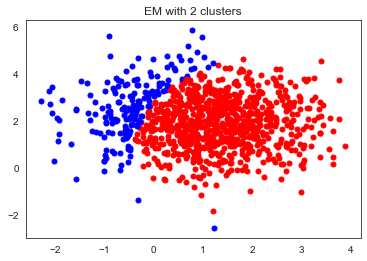

In [31]:
colors2 = ["r.","b."]
for i in range(len(simu)):
    plt.plot(simu[i][0], simu[i][1], colors2[labels[i]], markersize = 10)
plt.title('EM with 2 clusters')
plt.show()

L'algorithme EM a beaucoup de mal à diférencier les deuc classes.

### Question 3: Algorithme des k-means

#### Avec la fonction k-means de sklearn

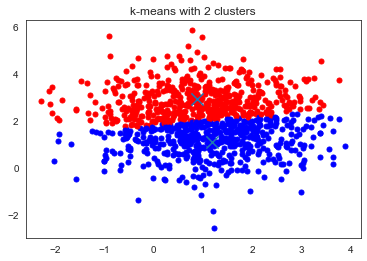

In [32]:
kmeans2 = KMeans(n_clusters=2)
kmeans2.fit(simu)
centroids2 = kmeans2.cluster_centers_
labels2 = kmeans2.labels_
colors2 = ["r.","b."]

for i in range(len(simu)):
    plt.plot(simu[i][0], simu[i][1], colors2[labels2[i]], markersize = 10)
plt.scatter(centroids2[:, 0],centroids2[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)
plt.title('k-means with 2 clusters')
plt.show()

L'algorithme des k-means parvient à faire deux classes.

#### En réécrivant la fonction k-means

In [33]:
class Kmeans(object):
    """ parametres : 
        * k : nombre de clusters
        * maxiter : nombre d'iterations
    """ 
    def __init__(self,k=3,maxiter=5):
        self.k, self.maxiter, self.centres,self.clust = k , maxiter, None,None,

     
    def fit(self,data):
        #Initialisation des centres
        #Renvoi k centres des à partir des données initiales
        centroids = data.copy()
        np.random.shuffle(centroids)
        self.centres = centroids[:self.k]
        self.clust = np.random.randint(0,self.k,data.shape[0]) 
        for t in range(self.maxiter):
            #Actualisation des centres : 
            #Renvoi les nouveaux centres auxquels les points les plus proches ont été assignés
            self.centres = np.array([data[self.clust==i].mean(axis=0) for i in range(self.k)])
            self.clust = self.predict(data)
        
    # Assignation des points à un cluster
    def predict(self,data):
        self.clust = np.zeros(data.shape[0])
        for j in range(data.shape[0]):
            #returns an array containing the index to the nearest centroid for each point
            distances = np.sqrt(((data[j] - self.centres[:, np.newaxis])**2).sum(axis=2))
            self.clust[j] = np.argmin(distances, axis=0)
        return self.clust


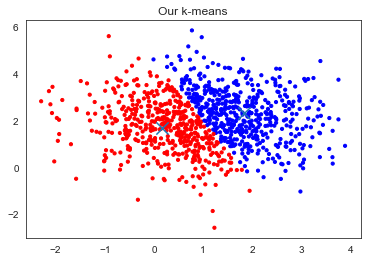

In [34]:
km = Kmeans(k=2,maxiter=100)
km.fit(simu)

colors = ['red','blue']
label = km.predict(simu) 
c = []
for i in range(0,1000):
    c.append( colors[int(label[i])])
plt.scatter(simu[:, 0], simu[:, 1], s = 10,c = c)

# Plot the centroids
centroids = km.centres
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)
plt.title('Our k-means')

plt.show()

On retrouve les même résultats.

## Exercice 3: EM algorithm for Gaussian Mixture
<hr style="border-width:2px;border-color:blue">

Nous avons choisi d'écrire une fonction d'intialisation à l'algorithme EM initailisant les $\mu$ en choisissant des lignes aléatoires dans le tableau de données initial.
Les matrices de variance covariance sont initialisées avec des matrices identité.

De plus nous avons implémenté deux algorithmes EM: le premier traite le cas général de matrices de variance covariance quelconques(EM_general). Le deuxième traite le cas particulier des boules Gaussiennes.

### Log vraisemblance

Afin de pouvoir comparer les deux algorithmes et vérifie'il fonctionne, implémentons une fonction calculant la log-vraisemblance à chaque étape:

A l'ittération $(q)$ on a:
$$\mathcal{L}_{incomplete}(\theta^{(q)})= \sum_{i=1}^n \sum_{k=1}^K \mathbb{E}[z_{ik}]\log(\pi_k^{(q)}) + \sum_{i=1}^n \sum_{k=1}^K \mathbb{E}[z_{ik}]\log\mathcal{N}_p(x_i|\mu_k^{(q)},\Sigma_k^{(q)}) = \sum_{i=1}^n \sum_{k=1}^K t_{ik}\log(\pi_k^{(q)}) + \sum_{i=1}^n \sum_{k=1}^K t_{ik}\log\mathcal{N}_p(x_i|\mu_k^{(q)},\Sigma_k^{(q)})$$

In [35]:
def logVrais(x,mu,pi,cov,label):
    res = 0
    for i in range(0,label.shape[0]):
        for j in range(0,4):
            if (label[i]==j):
                norm = multivariate_normal(mu[j,:], cov[j])
                res = res + np.log(norm.pdf(x[i])) + np.log(pi[j])
    return res

### Algorithme EM

L'étape E calcule l'ésperance de la variable latente $Z_{ik}$ c'est à dire la probabilité qu'a chaque cluster d'appartenir à chacun des clusters: c'est le calcul de la matrice $t_{ik}$.
Cette matrice est initialisée comme une matrice de 0 à $n$ lignes ($n$ étant le nombre de ligne du dataset originel) et $K$ colonnes ($K$ étant le nombre supposé de clusters).
Ainsi à l'ittération $(q)$ on a :
$$t_{ik}^{(q)} = \frac {\pi_k^{(q)} ~\mathcal{N}_p(x_i|\mu_k^{(q)}, \Sigma_k^{(q)}= \sigma_k^{(q)}I_p)}{\sum_{j=1}^K \pi_j^{(q)} \mathcal{N}_p(x_i|\mu_j^{(q)},\Sigma_j^{(q)} = \sigma_j^{(q)} I_p)}$$

L'étape M consiste en la maximisation de la log-vraisemblance dont le calcul se base sur les $t_{ik}$ precedement explicités.
A l'ittération $(q)$ on a :
$$\pi_k^{(q)} = \frac{\sum_{i=1}^n t_{ik}^{(q)}}{\sum_{k=1}^K \sum_{i=1}^n t_{ik}^{(q)}}$$
$$\mu_k^{(q)} = \frac {\sum_{i=1}^n t_{ik}^{(q)} x_i}{\sum_{i=1}^n t_{ik}^{(q)}}$$
$$\sigma_k^{(q)} = \frac {\sum_{i=1}^nt_{ik}^{(q)} (x_i - \mu_k^{(q)})^T(x_i - \mu_k^{(q)})}{\sum_{i=1}^n t_{ik}^{(q)}}$$

Pour les détails des calculs ci-dessus, voir le fichier pdf svp.

In [36]:
def EM_general(data,k):
    
    "Initialisation:"
    "Les centres sont choisis aléatoirement dans les lignes du tableau de données initial"
    "Les variances sont choisies aléatoirement (entre 0 et 1000)"
    "La matrice tik est de taille (k,n) = (nb_clusters,nb_données) et initialisée avec des 0"
    n,p = data.shape                             
    mu = np.asarray([pd.DataFrame(simu).sample() for i in range(k)]) 
    pi = np.ones((k))*1/float(k)                  
    cov = [np.identity(p) for i in range(k)]                                                     
    tik = np.zeros((k,n))
    
    "Définition du nombre d'ittérations"
    max_iter = 20
    "Liste contennant les log-vraisemblances"
    lv = []
                             
    "Algorithme EM"
    for it in range(0,max_iter):
        
        "Etape E"
        for j in range(0,k):
            "On simule des données Gausiennes de moyenne mu[j,:] et de matrice de variance-covariance cov[j]"
            norm = multivariate_normal(mu[j,:], cov[j])
            "On en calcule la densité"
            norm.pdf(data)
            "On remplie la ligne j de tik (correspondant au j-ième cluster)"
            tik[j,:] = pi[j]*norm.pdf(data)
        normalization = np.sum(tik,axis = 0)
        normalization=normalization.reshape(1,normalization.shape[0])
        tik = tik/normalization
        
        "Etape M"
        for i in range(0,k):
            "Extraction de la ligne de tik correspondant ai cluster i"
            a = tik[i,:].reshape(tik[i,:].shape[0],1)
            "Actualisation des vecteurs moyenne"
            mu[i,:] = np.sum(np.multiply(data,a)/np.sum(a),axis = 0)
            "Definition d'una matrice vide de variance covariance"
            cov[i] = np.zeros((p,p))
            "Actualisation de la matrice de varaince covariance"
            for t in range(0,n):
                "Calcul de x_i - mu_k (voire formule)"
                a=(data[t,:]-mu[i,:]).reshape((data[t,:]-mu[i,:]).shape[0],1)
                "Extraction de la ligne de tik correspondant ai cluster i"
                b=(tik[i,:]).reshape((tik[i,:]).shape[0],1)
                "Calcul de la transposée de x_i - mu_k"
                c=(data[t,:]-mu[i,:]).reshape(1,(data[t,:]-mu[i,:]).shape[0])
                cov[i] = cov[i] + np.dot(a,c)*tik[i,t] 
            cov[i] = cov[i]/np.sum(b)
            "Actualisation des pi"
            pi[i] = np.sum(tik[i,:])/np.sum(tik)
            
            "Attribution des clusters sur la base de la matrice tik"
            label = np.argmax(tik,axis = 0)
            
            "Calcul de la log-vraisemblance"
            lv.append(logVrais(data,mu,pi,cov,label))
            
    return mu,cov,pi,tik,lv,label

In [37]:
def EM_GBalls(data,k):
    
    "Initialisation:"
    "Les centres sont choisis aléatoirement dans les lignes du tableau de données initial"
    "Les variances sont choisies aléatoirement (entre 0 et 1000)"
    "La matrice tik est de taille (k,n) = (nb_clusters,nb_données) et initialisée avec des 0"
    n,p = data.shape                             
    mu = np.asarray([pd.DataFrame(simu).sample() for i in range(k)]) 
    pi = np.ones((k))*1/float(k)                 
    #sigma = [uniform(0,1000) for i in range(k)] 
    cov = [np.identity(p) for i in range(k)]                                                     
    #for i in range(k):
        #cov[i] = sigma[i]*cov[i]
    tik = np.zeros((k,n))
    
    "Définition du nombre d'ittérations"
    max_iter = 20
    "Liste contennant les log-vraisemblances"
    lv = []
                             
    "Algorithme EM"
    for it in range(0,max_iter):
        
        "Etape E"
        for j in range(0,k):
            "On simule des données Gausiennes de moyenne mu[j,:] et de matrice de variance-covariance cov[j]"
            norm = multivariate_normal(mu[j,:], cov[j])
            "On en calcule la densité"
            norm.pdf(data)
            "On remplie la ligne j de tik (correspondant au j-ième cluster)"
            tik[j,:] = pi[j]*norm.pdf(data)
        normalization = np.sum(tik,axis = 0)
        normalization=normalization.reshape(1,normalization.shape[0])
        tik = tik/normalization
        
        "Etape M"
        for i in range(0,k):
            a=tik[i,:].reshape(tik[i,:].shape[0],1)
            mu[i,:] = np.sum(np.multiply(data,a)/np.sum(a),axis = 0)
            cov[i] = (1/float(p)*np.sum(np.multiply(np.linalg.norm(data-mu[i,:],axis=1),tik[i,:]))/np.sum(tik[i,:]))*np.identity(p)
            pi[i] = np.sum(tik[i,:])/np.sum(tik)
            
        "Attribution des clusters sur la base de la matrice tik"
        label = np.argmax(tik,axis = 0)
            
        "Calcul de la log-vraisemblance"
        lv.append(logVrais(data,mu,pi,cov,label))
        
    return mu,cov,pi,tik,lv,label


In [42]:
mu,cov,pi,q,lv,label =EM_general(simu,k=3)

In [41]:
mu_bis,cov_bis,pi_bis,tik_bis,lv_bis,lab_bis = EM_GBalls(simu,k=3)

<function matplotlib.pyplot.show(*args, **kw)>

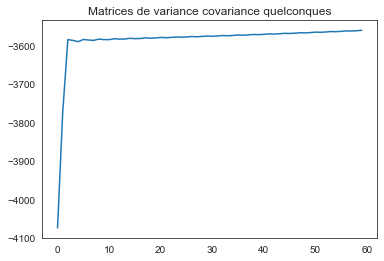

In [51]:
plt.plot(lv)
plt.title("Matrices de variance covariance quelconques")
plt.show

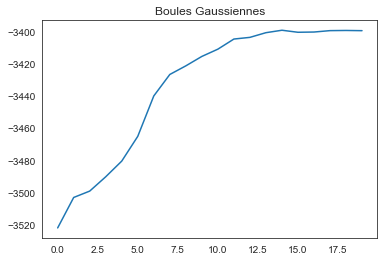

In [49]:
plt.plot(lv_bis)
plt.title("Boules Gaussiennes")
plt.show()

## Exercice 5: Data iris
<hr style="border-width:2px;border-color:blue">

In [52]:
from sklearn.datasets import load_iris
iris = load_iris()

In [53]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [54]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [55]:
iris_df = pd.DataFrame(data= np.c_[iris['data']],
                     columns= iris['feature_names'])

In [56]:
iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [70]:
data = iris_df.loc[:,['sepal length (cm)','sepal width (cm)']] 
data = np.asarray(data)
data

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [71]:
np.shape(data)

(150, 2)

### Kmeans

#### Avec la fontion de sklearn

In [58]:
kmeans_iris = KMeans(n_clusters=3)
kmeans_iris.fit(data)
centroids_iris = kmeans_iris.cluster_centers_
labels_iris = kmeans_iris.labels_
colors2 = ["r.","b.","g."]

#### Avec notre propre implémentation

In [59]:
km_iris = Kmeans(k=3,maxiter=100)
km_iris.fit(data)

colors = ['red','blue','green']
label_iris = km_iris.predict(data) 


#### Illustrations

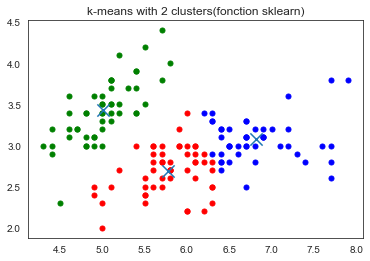

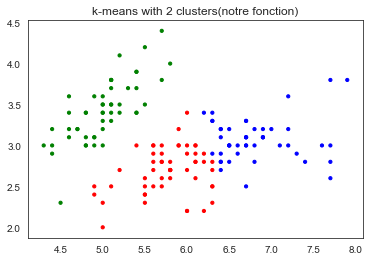

In [60]:
plt.subplot(111)
for i in range(len(data)):
    plt.plot(data[i][0], data[i][1], colors2[labels_iris[i]], markersize = 10)
plt.scatter(centroids_iris[:, 0],centroids_iris[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)
plt.title('k-means with 2 clusters(fonction sklearn)')
plt.show()


plt.subplot(111)
c = []
for i in range(0,150):
    c.append( colors[int(label_iris[i])])
plt.scatter(data[:, 0], data[:, 1], s = 10,c = c)
plt.title('k-means with 2 clusters(notre fonction)')
plt.show()

### Algorithme EM (nos implémentations)

In [72]:
mu1,cov1,pi1,tik1,lv1,lab1 = EM_general(data,k=3)


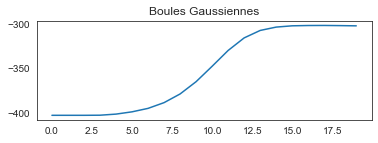

In [92]:
mu2,cov2,pi2,tik2,lv2,lab2 = EM_GBalls(data,k=3)

Text(0.5, 1.0, 'Matrices de variance covariance quelconques')

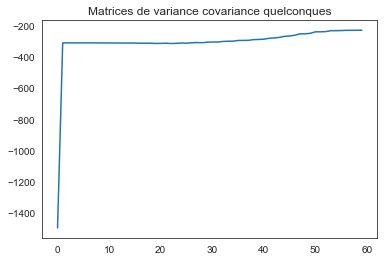

In [76]:
plt.subplot(111)
plt.plot(lv1)
plt.title("Matrices de variance covariance quelconques")

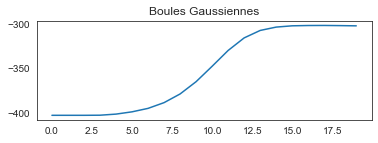

In [93]:
plt.subplot(212)
plt.plot(lv2)
plt.title("Boules Gaussiennes")
plt.show()

### Illustrations

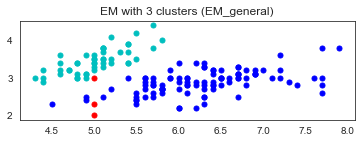

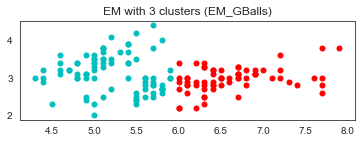

In [94]:
plt.subplot(211)
colors2 = ["r.","b.","c."]
for i in range(len(data)):
    plt.plot(data[i][0], data[i][1], colors2[lab1[i]], markersize = 10)
plt.title('EM with 3 clusters (EM_general)')
plt.show()

plt.subplot(211)
colors2 = ["r.","b.","c."]
for i in range(len(data)):
    plt.plot(data[i][0], data[i][1], colors2[lab2[i]], markersize = 10)
plt.title('EM with 3 clusters (EM_GBalls)')
plt.show()

